In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

import pickle as pickle

import sys
path = '../../scripts/'
sys.path.insert(0,path)
from ripser_to_dict import *
#from plot_persistence import *

In [2]:
with open('params.pickle','rb') as f:
    params = pickle.load(f)

## Functions

In [3]:
def rectangularize_triangle(in_im,im_size,bmin,dmax):
    
    n_points = in_im.shape[0]
    kmax = 2 * (im_size[0] - 1)
    lmax = 2 * im_size[1] - 1
    b = in_im[:,0]
    d = in_im[:,1]
    
    k = kmax / (np.pi / 2.) * np.arctan((dmax - d) / (b - bmin))
    l = (lmax + 1) / (dmax - bmin) * (d - b)
    out_im = [k,l] #????
    
    return out_im
    

In [4]:
def closest_pixel(PD,im_size,max_persistence):
    
    """Moves points to nearest intersection in a grid. Input is a collection of (b,d)-points."""
    
    width = im_size[0]
    height = im_size[1]
    
    out_im = np.zeros((height,width))
    rx = max_persistence/(float)(width - 1)
    ry = max_persistence/(float)(height - 1)
    n_points = PD.shape[0]
    
    for y in range(height):
        for x in range(width):
            for n in range(n_points):
                its_close_to_x = -rx/2. < PD[n,0] - rx*x < rx/2.
                its_close_to_y = -ry/2. < PD[n,1] - ry*y < ry/2.
                if its_close_to_x and its_close_to_y:
                    out_im[y,x] += 1
                    
    out_im = np.flipud(out_im)
    
    return out_im

In [6]:
def create_cifar_library(params,all_bmins,all_bmax):
    
    """Note, this time it is for the rectangularized triangles"""
    
    im_size = [32, 32]
    channels = params['architecture']['channels']
    
    for shape in params['shapes']['names']:
        for seed in params['shapes']['all_seeds']:
            with open(params['paths']['code_to_data'] + 'persistences/'\
                      + shape + '/' + str(seed) + '.txt', \
                      'rb') as f:
                temp = pickle.load(f)
            for channel in channels:
                PD = temp[channel].copy()
                PD = rectangularize_triangle(PD,im_size,all_bmins[channel],all_dmax[channel])
                out_im = closest_pixel(PD,im_size,params['ripser']['max_persistence'])
                np.savetxt(params['paths']['code_to_data'] + 'pixelations/cifar/'\
                       + shape + '/' + str(seed) + '-' + str(channel) + '.dat',\
                       out_im, delimiter=',')
            del temp

## Run

In [7]:
# find bmin and dmax
all_bmins = np.zeros(params['architecture']['n_channels']) + np.inf
all_dmax = np.zeros(params['architecture']['n_channels'])
for shape in ['circle','sphere']:#params['shapes']['names']:
    for seed in [0,2]: #params['shapes']['all_seeds']:
        with open(params['paths']['code_to_data'] + 'persistences/'\
              + shape + '/' + str(seed) + '.txt', \
              'rb') as f:
            temp = pickle.load(f)
        for channel in params['architecture']['channels']:
            temp_bmin = min(temp[channel][:,0].copy())
            if temp_bmin < all_bmins[channel]:
                all_bmins[channel] = temp_bmin
            temp_dmax = max(temp[channel][:,1].copy())
            if temp_dmax > all_dmax[channel]:
                all_dmax[channel] = temp_dmax
        del temp

In [8]:
with open(params['paths']['code_to_data'] + 'persistences/'\
                    + 'sphere' + '/' + '1' + '.txt', \
                    'rb') as f:
                    temp = pickle.load(f)
PD = temp[0].copy()
PD = rectangularize_triangle(PD,[32,32],all_bmins[channel],all_dmax[channel])

/Users/henrikaslund/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:9: RuntimeWarning: divide by zero encountered in true_divide


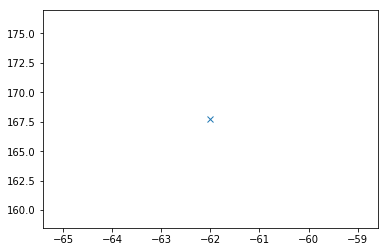

In [9]:
plt.plot(PD[0],PD[1],'x')

In [11]:
print(temp)

{0: array([[ 0. ,  2.5]]), 'range': [0.0, 2.07754], 2: array([[ 0.778937 ,  0.794831 ],
       [ 0.769157 ,  0.804963 ],
       [ 0.722517 ,  0.730638 ],
       [ 0.679206 ,  0.68697  ],
       [ 0.616204 ,  0.666292 ],
       [ 0.595591 ,  0.598302 ],
       [ 0.592459 ,  0.612584 ],
       [ 0.586625 ,  0.596476 ],
       [ 0.544399 ,  0.613304 ],
       [ 0.518131 ,  0.528876 ],
       [ 0.516065 ,  0.568944 ],
       [ 0.496358 ,  0.518131 ],
       [ 0.496084 ,  0.607486 ],
       [ 0.493341 ,  0.709681 ],
       [ 0.493341 ,  0.7331   ],
       [ 0.493304 ,  0.641348 ],
       [ 0.493304 ,  0.575105 ],
       [ 0.48639  ,  0.496515 ],
       [ 0.48639  ,  0.503509 ],
       [ 0.483581 ,  0.611042 ],
       [ 0.483581 ,  0.611042 ],
       [ 0.483581 ,  0.544795 ],
       [ 0.483581 ,  0.614629 ],
       [ 0.482409 ,  0.55952  ],
       [ 0.475839 ,  0.587848 ],
       [ 0.470656 ,  0.551834 ],
       [ 0.470656 ,  0.529144 ],
       [ 0.470618 ,  0.471409 ],
       [ 0.468112 ,  

In [17]:
with open('../../../heavy_files/exercises/ml_on_1_to_3/torus_persistences/1.txt','rb') as f:
    x = pickle.load(f)
print(x)

{0: array([[ 0.      ,  0.117035],
       [ 0.      ,  0.168296],
       [ 0.      ,  0.211401],
       [ 0.      ,  0.257658],
       [ 0.      ,  0.281712],
       [ 0.      ,  0.291944],
       [ 0.      ,  0.292637],
       [ 0.      ,  0.309097],
       [ 0.      ,  0.318315],
       [ 0.      ,  0.326642],
       [ 0.      ,  0.34814 ],
       [ 0.      ,  0.34925 ],
       [ 0.      ,  0.356264],
       [ 0.      ,  0.361191],
       [ 0.      ,  0.374498],
       [ 0.      ,  0.375494],
       [ 0.      ,  0.377775],
       [ 0.      ,  0.38488 ],
       [ 0.      ,  0.390958],
       [ 0.      ,  0.391079],
       [ 0.      ,  0.395349],
       [ 0.      ,  0.405333],
       [ 0.      ,  0.411992],
       [ 0.      ,  0.413958],
       [ 0.      ,  0.421987],
       [ 0.      ,  0.424318],
       [ 0.      ,  0.424485],
       [ 0.      ,  0.427077],
       [ 0.      ,  0.431072],
       [ 0.      ,  0.431719],
       [ 0.      ,  0.433617],
       [ 0.      ,  0.43646 ],
    